In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from PIL.Image import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from pathlib import Path

In [14]:
data_dir = Path(r"C:\Users\theerachat\Desktop\school\P_4\Ser_2\CPE_430\z_pro")
print(data_dir)

C:\Users\theerachat\Desktop\school\P_4\Ser_2\CPE_430\z_pro


In [15]:
import os

for item in os.listdir(data_dir):
    print(item)


Mika
Rei
Tressa


In [16]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

440


In [19]:
Mika = list(data_dir.glob('Rei/*'))
im = PIL.Image.open(str(Mika[33]))
im.show()

In [11]:
batch_size = 32
img_height = 300
img_width = 200

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=224,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 440 files belonging to 3 classes.
Using 352 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=224,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 440 files belonging to 3 classes.
Using 88 files for validation.


In [14]:
class_names = train_ds.class_names

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
num_classes = len(class_names)

model = Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 300, 200, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 300, 200, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 300, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 300, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 100, 16)     0         
 )                                                      

In [20]:
epochs=10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )

Epoch 1/10
11/11 [==============================] - 12s 789ms/step - loss: 2.0515 - accuracy: 0.3381 - val_loss: 1.0723 - val_accuracy: 0.3523
Epoch 2/10
11/11 [==============================] - 8s 721ms/step - loss: 1.0345 - accuracy: 0.4659 - val_loss: 0.8536 - val_accuracy: 0.7159
Epoch 3/10
11/11 [==============================] - 9s 796ms/step - loss: 0.7212 - accuracy: 0.7528 - val_loss: 0.5843 - val_accuracy: 0.7273
Epoch 4/10
11/11 [==============================] - 9s 780ms/step - loss: 0.5606 - accuracy: 0.7358 - val_loss: 0.4969 - val_accuracy: 0.7727
Epoch 5/10
11/11 [==============================] - 9s 824ms/step - loss: 0.4251 - accuracy: 0.8097 - val_loss: 0.4085 - val_accuracy: 0.8523
Epoch 6/10
11/11 [==============================] - 8s 757ms/step - loss: 0.3514 - accuracy: 0.8580 - val_loss: 0.3448 - val_accuracy: 0.8977
Epoch 7/10
11/11 [==============================] - 8s 763ms/step - loss: 0.2751 - accuracy: 0.8977 - val_loss: 0.3480 - val_accuracy: 0.8636
Epoch

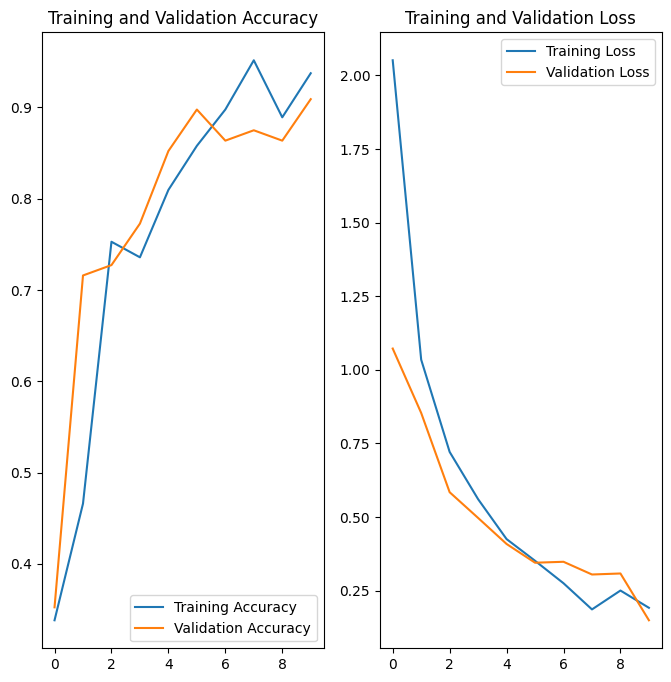

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
img = tf.keras.utils.load_img(
    str(Mika[22]), target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
res = class_names[np.argmax(predictions)]
print(predictions)
print(res)

1/1 [==============================] - 0s 127ms/step
[[-6.9874835  4.5272336  2.3348503]]
Rei


In [23]:
rei_test = Path(r"C:\Users\theerachat\Desktop\school\P_4\Ser_2\CPE_430\rei_test.png")
print(rei_test)

img = tf.keras.utils.load_img(
    str(rei_test), target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
res = class_names[np.argmax(predictions)]
print(predictions)
print(res)

C:\Users\theerachat\Desktop\school\P_4\Ser_2\CPE_430\rei_test.png
1/1 [==============================] - 0s 33ms/step
[[-3.7383423  2.21841    1.6239343]]
Rei
